In [42]:
import tensorflow.keras as keras
import math
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages

In [43]:
mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [44]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [45]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal','Shirt','Sneaker', 'Bag', 'Ankle boot']

In [46]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

<Axes: >

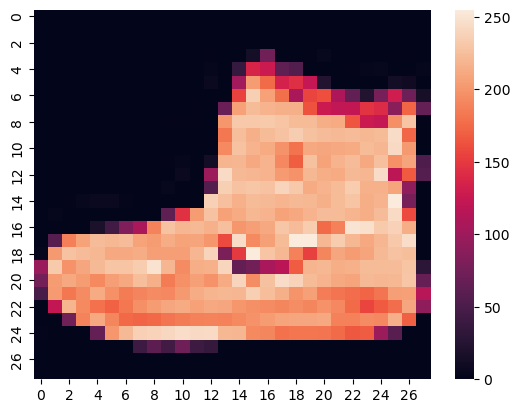

In [47]:
sns.heatmap(train_images[0])

Scale values to range 0-1 is needed before feeding to the neural network model. 

In [48]:
train_images = train_images / 255.0
test_images = test_images / 255.0

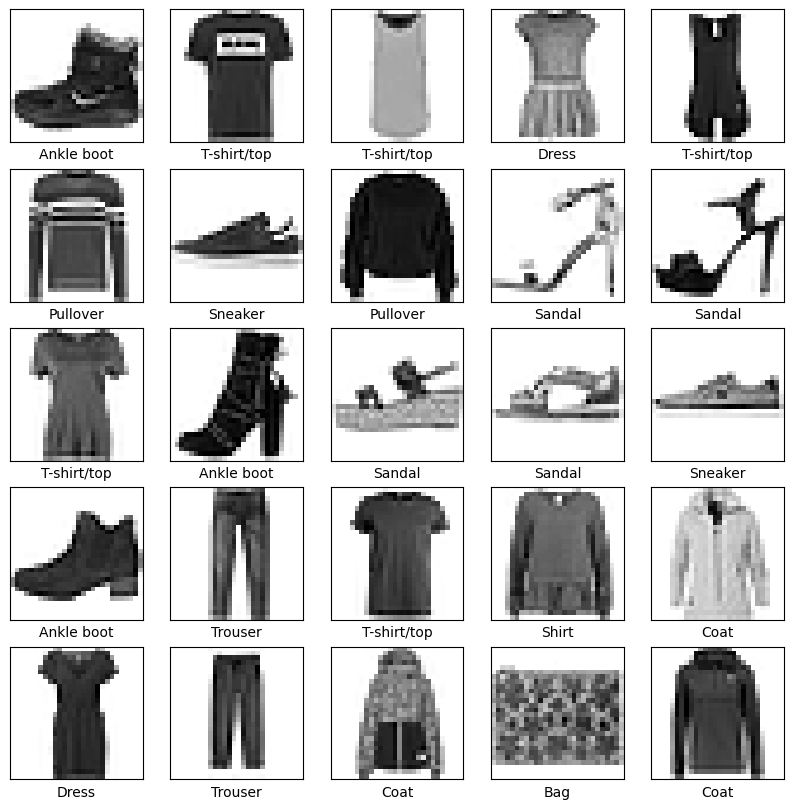

In [40]:
# visualize first 10 images from the data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])        
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


model = keras.Sequential([
    input shape transforms the format of images from 2d array(28 by 28 to a 1d array of 28)
  this layer is unstacking rows of pixels and lining them up. No paramenter to learn, just reformats the data
    keras.layers.Flatten(input_shape=(28,28)),
 Now after the layers are flatted dense layers, they are densely connected or fully connected neural layers. First has 128 
  nodes(neurons), while second has 10 nodes with softmax layer and it returns an array of 10 probability scores that
    # sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of those 10 classes

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model.compile(optimizer='adam',
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 758us/step - accuracy: 0.7844 - loss: 0.6246
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.8602 - loss: 0.3858
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 823us/step - accuracy: 0.8759 - loss: 0.3406
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - accuracy: 0.8838 - loss: 0.3154
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.8894 - loss: 0.2979
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - accuracy: 0.8957 - loss: 0.2813
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.9025 - loss: 0.2626
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - accuracy: 0.9073 - loss: 0.2495
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - accuracy: 0.9100 - loss: 0.2409
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.9126 - loss: 0.2370


In [55]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.8843 - loss: 0.3370
Test accuracy: 0.8863000273704529


In [56]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step


Prediction is an array of 10 numbers, that describe the confidence of the model that the image correponds to each of the 10 different articles of clothing

In [57]:
predictions[1]

array([5.39295934e-06, 8.47015990e-19, 9.99706864e-01, 4.83798461e-12,
       1.86838937e-04, 1.28129583e-15, 1.00881574e-04, 1.49458819e-18,
       1.64630583e-11, 1.82927374e-18], dtype=float32)

In [62]:
np.argmax(predictions[2])

1

In [63]:
test_labels[2]

1

In [64]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])        
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel('{} {:2.0f}% ({})'. format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                          color=color)

In [70]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])        
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

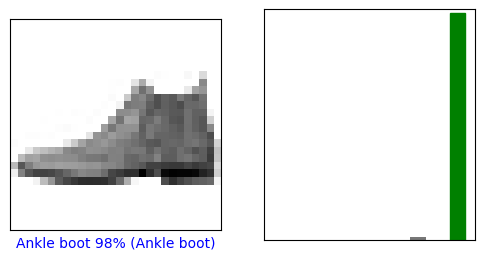

In [71]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

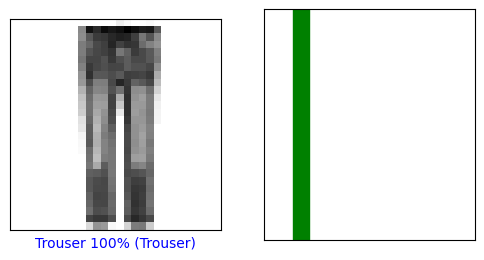

In [73]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

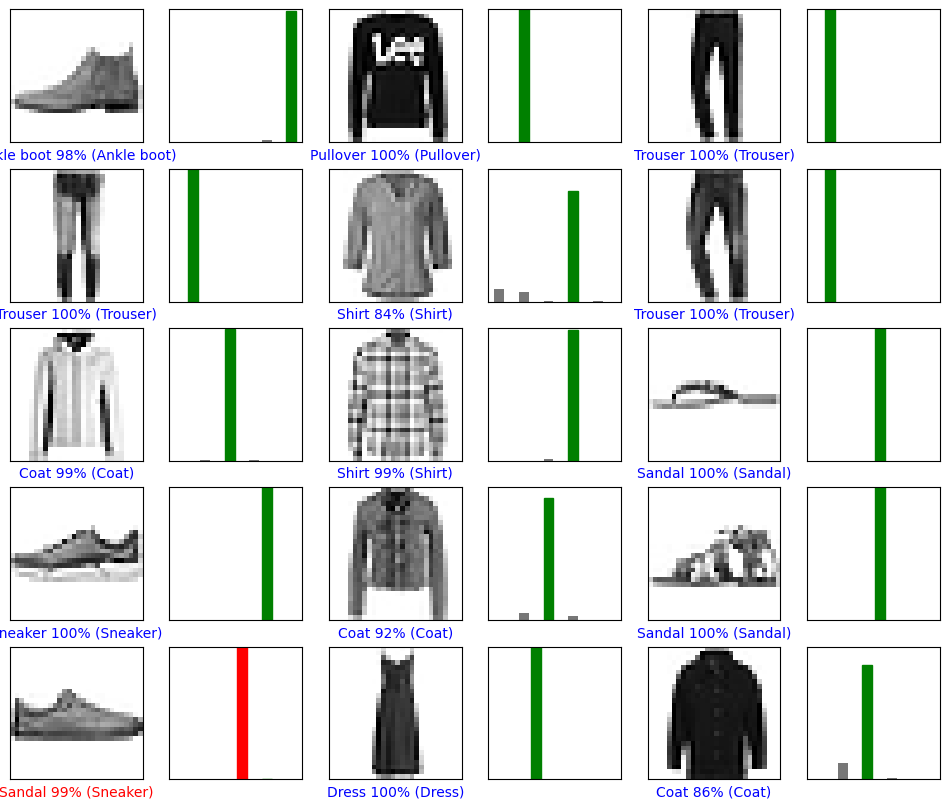

In [76]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()